<a href="https://colab.research.google.com/github/chayhuixiang/tensorflow-starter/blob/main/6%20-%20Convolutional%20Neural%20Networks%20-%20CNNs/2_CNN_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The Data

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Getting the shape of the training set
x_train.shape

# 60000 images, each 28 by 28 grayscale

(60000, 28, 28)

In [ ]:
single_image = x_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

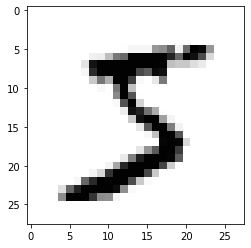

In [ ]:
plt.imshow(single_image,cmap='Greys')

In [ ]:
# Exploring the labels
y_train
# Need to one-hot encode these labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# One hot encoding
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_example = to_categorical(y_train)
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [ ]:
# Normalise pixels of image to be from 0 to 1
x_train = x_train/255
x_test = x_test/255

In [ ]:
scaled_image = x_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# batch_size, width, height, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [ ]:
x_test = x_test.reshape(10000,28,28,1)

# Creating and Training the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

# Good starting point for number of filters is 32, if more complex classification then use more filters
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# keras.io/metrics to find out what metrics are available

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [ ]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1395 - accuracy: 0.9580 - val_loss: 0.0627 - val_accuracy: 0.9796
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0419 - val_accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0291 - accuracy: 0.9906 - val_loss: 0.0370 - val_accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0435 - val_accuracy: 0.9868


# Evaluating the model

In [ ]:
metrics = pd.DataFrame(model.history.history)

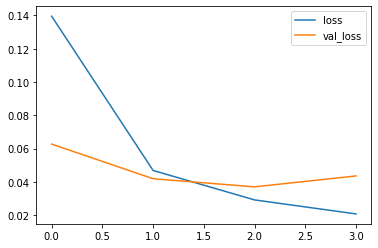

In [ ]:
metrics[['loss','val_loss']].plot()

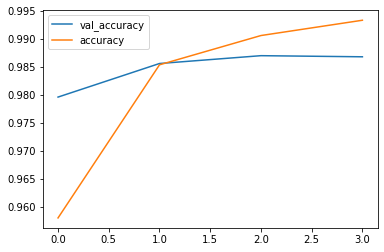

In [ ]:
metrics[['val_accuracy','accuracy']].plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
preds = model.predict(x_test) # (n_images, n_class)
predictions = np.argmax(preds , axis=1)  # (n_images,)

In [ ]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 973    0    2    0    0    0    3    1    1    0]
 [   0 1128    3    1    0    0    2    0    1    0]
 [   0    0 1028    0    1    0    0    0    3    0]
 [   0    0    3 1001    0    3    0    0    3    0]
 [   0    0    1    0  978    0    0    0    0    3]
 [   2    0    1    9    0  876    3    0    1    0]
 [   5    2    1    0    9    2  933    0    6    0]
 [   1    2   10    2    0    0    0 1009    2    2]
 [   5    1    1    1    2    3    0    1  958    2]
 [   0    0    0    3    9    6    0    6    1  984]]


In [ ]:
import seaborn as sns


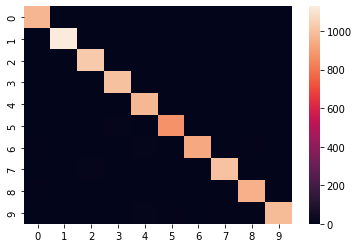

In [ ]:
sns.heatmap(confusion_matrix(y_test,predictions))

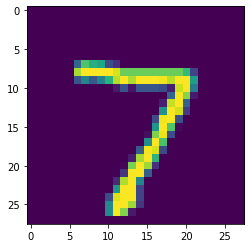

In [ ]:
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28))

In [ ]:
preds = model.predict(my_number.reshape(1,28,28,1)) # (n_images, n_class)
y_classes = np.argmax(preds , axis=1)  # (n_images,)
y_classes

array([7])

In [ ]:
y_test[0]

7